In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ecco_v4_py as ecco
import sys
sys.path.append('/home3/sreich/MITgcm_c68w/MITgcm/utils/python/MITgcmutils')

from MITgcmutils import rdmds, llc


sys.path.append('/home3/sreich/jupyter/jupyter_notebooks')
from patchface3D import *
from read_write import *


In [6]:
nx = 90
nxh = 270
nz = 50

run_dir_90='/nobackup/sreich/multigrid_test_ou/c68w/llc90/run.v4_rls4.077d3.iter0.fwd/'
run_dir_270='/nobackup/sreich/multigrid_test_ou/c68w/llc270/run.fwd_270.076c.iter51/'


(105300,)
(947700,)
1
(90, 270, 1)
1
(270, 810, 1)


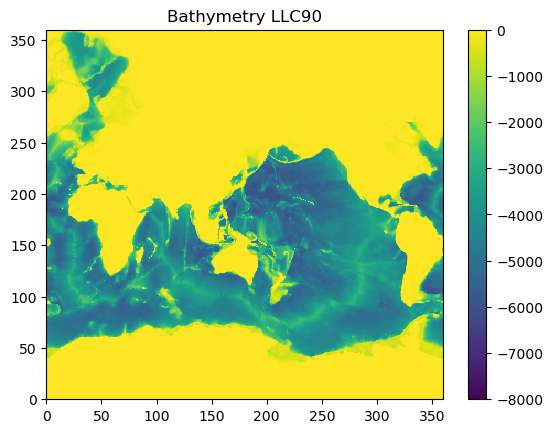

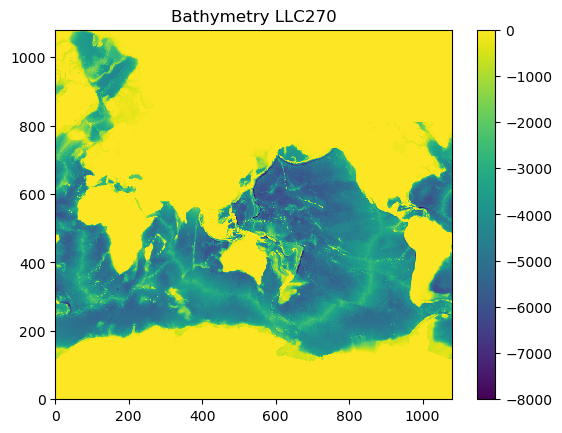

In [16]:
bathy_90 = read_float32(run_dir_90 + 'bathy_eccollc_90x50_min2pts.bin').reshape(nx*13, nx)
bathy_270 = read_float32(run_dir_270 + 'bathy270_filled_noCaspian_r4').reshape(nxh*13, nxh)

bathy_90 = patchface3D(bathy_90, nx, 1)[0, :, :]
bathy_270 = patchface3D(bathy_270, nxh, 1)[0, :, :]

plt.pcolormesh(bathy_90, vmin = -8000, vmax = 0)
plt.colorbar()
plt.title('Bathymetry LLC90')
plt.show()

plt.pcolormesh(bathy_270, vmin = -8000, vmax = 0)
plt.colorbar()
plt.title('Bathymetry LLC270')
plt.show()

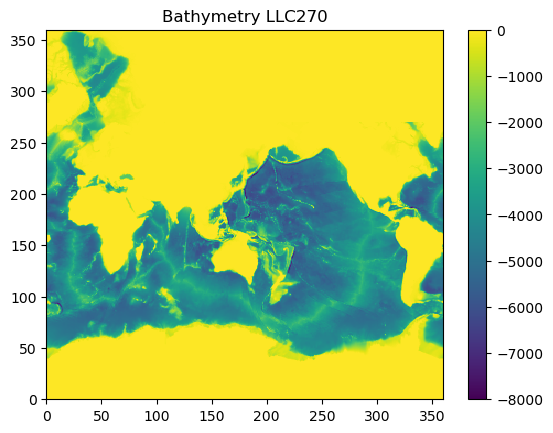

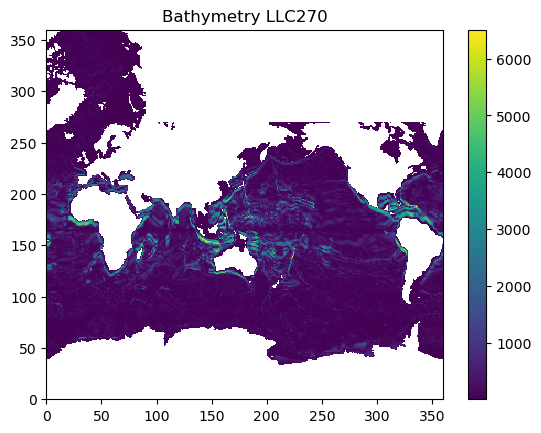

In [24]:
# bin average bathy_270 to get bathy_coarsened in llc90 dimensions

bathy_coarsened = bathy_270.reshape(360, 3, 360, 3).mean(axis=(1, 3))

plt.pcolormesh(bathy_coarsened, vmin = -8000, vmax = 0)
plt.colorbar()
plt.title('Bathymetry LLC270')
plt.show()

tmp = np.abs(bathy_coarsened - bathy_90)
tmp[tmp == 0] = np.nan
plt.pcolormesh(tmp)
plt.colorbar()
plt.title('Bathymetry LLC270')
plt.show()

In [46]:
# Compare ICs

pk_90 = rdmds(run_dir_90 + 'pickup.0000000001')
pk_270 = rdmds(run_dir_270 + 'pickup.0000000001')

1
(90, 270, 1)


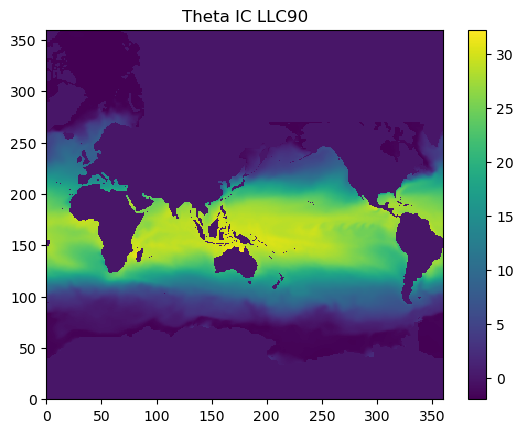

1
(270, 810, 1)


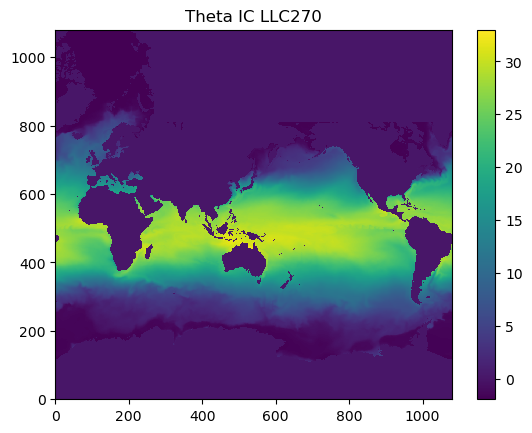

In [47]:
theta_90 = pk_90[100,:,:]
plt.pcolormesh(patchface3D(theta_90, nx, 1)[0, :, :])
plt.colorbar()
plt.title('Theta IC LLC90')
plt.show()

theta_270 = pk_270[100,:,:]
plt.pcolormesh(patchface3D(theta_270, nxh, 1)[0, :, :])
plt.colorbar()
plt.title('Theta IC LLC270')
plt.show()

1
(270, 810, 1)
1
(90, 270, 1)


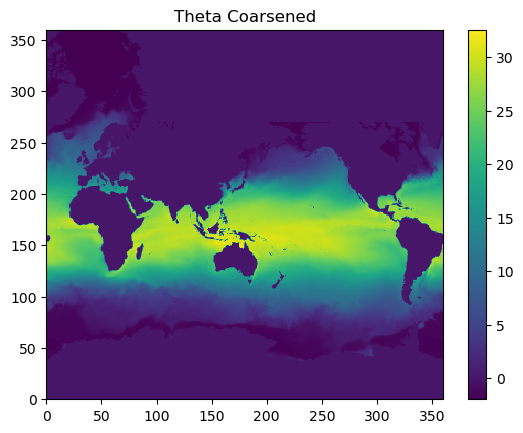

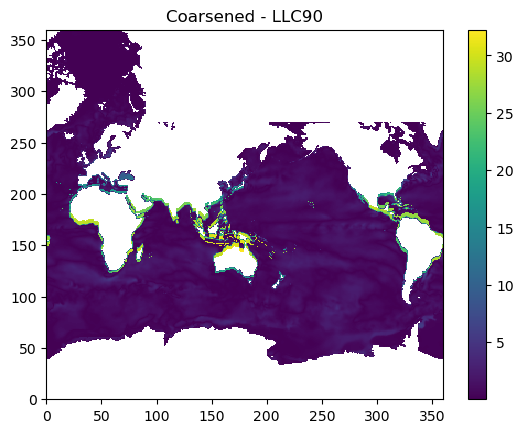

In [48]:
theta_270 = patchface3D(theta_270, nxh, 1)[0, :, :]
theta_90 = patchface3D(theta_90, nx, 1)[0, :, :]
theta_coarsened = theta_270.reshape(360, 3, 360, 3).mean(axis=(1, 3))

plt.pcolormesh(theta_coarsened)
plt.colorbar()
plt.title('Theta Coarsened')
plt.show()

tmp = np.abs(theta_coarsened - theta_90)
tmp[tmp == 0] = np.nan
plt.pcolormesh(tmp)
plt.colorbar()
plt.title('Coarsened - LLC90')
plt.show()